# Data Model -  Regression

## Initial Setup for XGBoost

In [1]:
#installation for xgboost
!pip install xgboost 

## Import Libraries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import set_config
set_config(print_changed_only=False)
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing 
import math
%matplotlib inline
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")


## Loading dataset 

In [3]:
#Loading Data
train_final = pd.read_csv (r'Datasets\train_final.csv')  
train_final.Date = pd.to_datetime(train_final.Date,format='%Y-%m-%d')
train_final.index = train_final.Date
train_final = train_final.drop('Date', axis=1)

## Regressions (Imported from 2 Data Model- Regressions)

In [4]:
##Setting training and test set arranged by date order (Included all variables used to determine)
train_data, test_data = train_test_split(train_final, train_size = 0.7,shuffle=False)
X_train, y_train = train_data[['Store', 'Dept','IsHoliday','Type','Size','Year','Week']], train_data['Weekly_Sales']
X_test, y_test = test_data[['Store', 'Dept','IsHoliday','Type','Size','Year','Week']], test_data['Weekly_Sales']

#Decision tree model
dt = DecisionTreeRegressor(min_samples_split=54,min_samples_leaf=25,max_depth=440,random_state=42)
dt=dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=200,min_samples_split=15, min_samples_leaf=8,max_depth=200)        
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

#XGBoost
xgb=xgb.XGBRegressor(min_child_weight=5,max_depth=25,learning_rate=0.05,gamma=0.1,colsample_bytree=0.7)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

##  Imported from 1 Data Model- Time Series

In [32]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Importing the final version of the train csv
train_final = pd.read_csv(r'Datasets\train_final.csv')
train_final['Date'] = pd.to_datetime(train_final['Date'], format='%Y-%m-%d')
train_final.set_index('Date', inplace=True)

# Setting training and test set arranged by date order
train_final1 = train_final.groupby(train_final.index).mean()
train_data = train_final1['Weekly_Sales']
train_data = train_data[:int(0.7 * len(train_data))]
test_data = train_final1[int(0.7 * len(train_final1)):]

# Loading preset of AutoReg
lags = 1  # Adjust as needed
model_ar = AutoReg(train_data, lags=lags)
model_ar_fit = model_ar.fit()
predictions_AR = model_ar_fit.predict(start=100, end=142)

# Loading preset of MA
model_ma = ARIMA(train_data, order=(2, 0, 0))
model_fit = model_ma.fit()
predictions_MA = model_fit.predict(100, 142)

# Loading preset of ARIMA
model_ARIMA = ARIMA(train_data, order=(2, 0, 0))
model_ARIMA_fit = model_ARIMA.fit()
predictions_ARIMA = model_ARIMA_fit.predict(start=100, end=142)

# Loading preset of SARIMA
model_SARIMA = SARIMAX(train_data, order=(1, 0, 2), seasonal_order=(1, 0, 1, 52))
model_SARIMA_fit = model_SARIMA.fit()
predictions_SARIMA = model_SARIMA_fit.predict(start=100, end=142)



In [33]:
# # Loading preset of Holt Winters Method
# model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=52, trend='mul', seasonal='add', initialization_method='estimated').fit()
# prediction_Holt = model_holt_winters.predict(start=100, end=142)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

## Comparison of the Models with MSE, RMSE, MAE

In [34]:
print('MSE')

print('2','SARIMA', round(mean_squared_error(test_data.Weekly_Sales,predictions_SARIMA),2))
print('3','ARIMA', round(mean_squared_error(test_data.Weekly_Sales,predictions_ARIMA),2))
print('4','MA', round(mean_squared_error(test_data.Weekly_Sales,predictions_MA),2))
print('5','AR', round(mean_squared_error(test_data.Weekly_Sales,predictions_AR),2))
print('6','XGB', round(mean_squared_error(y_test,y_pred_xgb),2))
print('7','RFR', round(mean_squared_error(y_test,y_pred_rfr),2))
print('8','DT', round(mean_squared_error(y_test,y_pred_dt),2))

print(" ")
print('RMSE')
print('2','SARIMA', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, predictions_SARIMA)),2))
print('3','ARIMA', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, predictions_ARIMA)),2))
print('4','MA', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, predictions_MA)),2))
print('5','AR', round(math.sqrt(mean_squared_error(test_data.Weekly_Sales, predictions_AR)),2))
print('6','XGB', round(math.sqrt(mean_squared_error(y_test,y_pred_xgb)),2))
print('7','RFR', round(math.sqrt(mean_squared_error(y_test,y_pred_rfr)),2))
print('8','DT', round(math.sqrt(mean_squared_error(y_test,y_pred_dt)),2))

print(" ")
print('MAE')
print('2','SARIMA', round(mean_absolute_error(test_data.Weekly_Sales,predictions_SARIMA),2))
print('3','ARIMA', round(mean_absolute_error(test_data.Weekly_Sales,predictions_ARIMA),2))
print('4','MA', round(mean_absolute_error(test_data.Weekly_Sales,predictions_MA),2))
print('5','AR', round(mean_absolute_error(test_data.Weekly_Sales,predictions_AR),2))
print('6','RFR', round(mean_absolute_error(y_test,y_pred_rfr),2))
print('7','XGB', round(mean_absolute_error(y_test,y_pred_xgb),2))
print('8','DT', round(mean_absolute_error(y_test,y_pred_dt),2))


MSE
2 SARIMA 340319.29
3 ARIMA 1000899.97
4 MA 1000899.97
5 AR 770785.74
6 XGB 99717603.74
7 RFR 113841782.65
8 DT 140317188.19
 
RMSE
2 SARIMA 583.37
3 ARIMA 1000.45
4 MA 1000.45
5 AR 877.94
6 XGB 9985.87
7 RFR 10669.67
8 DT 11845.56
 
MAE
2 SARIMA 420.78
3 ARIMA 730.62
4 MA 730.62
5 AR 661.0
6 RFR 5338.25
7 XGB 5617.77
8 DT 6315.0


## Taking a store as an example

Since the time series so far are based on a single point for each day. For management overall view. If needed to be accurate for each store as each store and department has different variables, each store and department needed to have it own models for time series. Whereas for regression models, it does not. For easier comparison and prediction, we would choose one department of a store for comparison.

### Choosing a department to implement the models

In [35]:
#Reading the csv and merge
train_raw = pd.read_csv (r'Datasets\train.csv') 
features_raw=pd.read_csv(r'Datasets\features.csv')
stores_raw= pd.read_csv(r'Datasets\stores.csv')
train_merged = train_raw.merge(stores_raw, on=['Store'], how='inner').merge(features_raw, on=['Store','Date','IsHoliday'], how='inner')

In [36]:
#Changing the values of Store and Dept to string for concatenate
train_edited=train_merged
train_edited.Store = [str(i) for i in train_edited.Store] 
train_edited.Dept = [str(i) for i in train_edited.Dept] 
a=train_edited.Store
b=train_edited.Dept
train_edited['Store_Dept']=a+'_'+b
train_edited1=train_edited
train_edited1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store_Dept
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1_1
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1_1
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,1_1
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,1_1
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,1_1


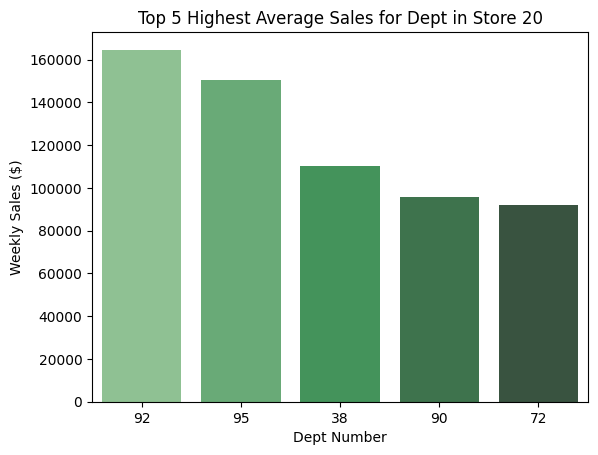

In [39]:
# See which department in Store 20 has the highest average sales
train_edited2 = train_edited1.copy()  # Make a copy to avoid modifying the original DataFrame
S20 = train_edited2[train_edited2['Store'] == '20']
S20_mean = S20.groupby(S20['Dept'])['Weekly_Sales'].mean()  # Ensure 'Weekly_Sales' is used and specify it explicitly

largest_5_SD = S20_mean.nlargest(5)  # Removed unnecessary comma
sns.barplot(x=largest_5_SD.index, y=largest_5_SD.values, order=largest_5_SD.sort_values(ascending=False).index, palette="Greens_d")
plt.title("Top 5 Highest Average Sales for Dept in Store 20")
plt.xlabel('Dept Number')
plt.ylabel('Weekly Sales ($)')
plt.show()


### Data Manipulation for Store 20 Dept 92

In [43]:
import pandas as pd

# Assuming S20 is defined and contains the necessary data
S20D92 = S20[S20['Dept'] == '92']

# Drop unnecessary columns
columns_to_drop = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Store_Dept']
S20D92 = S20D92.drop(columns_to_drop, axis=1)

# Replace "Type" from A, B, C to 3, 2, 1
S20D92['Type'] = S20D92['Type'].apply(lambda x: 3 if x == 'A' else (2 if x == 'B' else 1))

# Replace "IsHoliday" from True and False to 1 and 0
S20D92['IsHoliday'] = S20D92['IsHoliday'].astype(int)

# Setting data frame date format and adding two new columns 'Year' and 'Week' for separating the data to visualize
S20D92['Date'] = pd.to_datetime(S20D92['Date'], format='%Y-%m-%d')
S20D92['Year'] = S20D92['Date'].dt.year
S20D92['Week'] = S20D92['Date'].dt.isocalendar().week

# Switching the IsHoliday value of Week 51 and Week 52 to 1 and 0 respectively
S20D92.loc[S20D92['Week'] == 51, 'IsHoliday'] = 1
S20D92.loc[S20D92['Week'] == 52, 'IsHoliday'] = 0

# Make Date as the index
S20D92.set_index('Date', inplace=True)

# Print the first few rows of the modified DataFrame
print(S20D92.head())


           Store Dept  Weekly_Sales  IsHoliday  Type    Size  Year  Week
Date                                                                    
2010-02-05    20   92     195223.84          0     3  203742  2010     5
2010-02-12    20   92     170043.55          1     3  203742  2010     6
2010-02-19    20   92     164314.29          0     3  203742  2010     7
2010-02-26    20   92     147699.66          0     3  203742  2010     8
2010-03-05    20   92     169171.18          0     3  203742  2010     9


### Implement the previous train and test set and other Time Series Models with previous parameters

In [47]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Set train and test set
train_data_oneSD = S20D92['Weekly_Sales'][:int(0.7*(len(S20D92)))]
test_data_oneSD = S20D92['Weekly_Sales'][int(0.7*(len(S20D92))):]

# Implement model for AR
model_ar = AutoReg(train_data_oneSD, lags=1)
model_ar_fit = model_ar.fit()
predictions_AR_one = model_ar_fit.predict(start=100, end=142)

# Implement model for MA
model_ma = ARIMA(train_data_oneSD, order=(2, 0, 0))
model_fit = model_ma.fit()
predictions_MA_one = model_fit.predict(100, 142)

# Implement model for ARIMA
model_ARIMA = ARIMA(train_data_oneSD, order=(2, 0, 0))
model_ARIMA_fit = model_ARIMA.fit()
predictions_ARIMA_one = model_ARIMA_fit.predict(start=100, end=142)

# Implement model for SARIMA
model_SARIMA = SARIMAX(train_data_oneSD, order=(1, 0, 2), seasonal_order=(1, 0, 1, 52))
model_SARIMA_fit = model_SARIMA.fit()
predictions_SARIMA_one = model_SARIMA_fit.predict(start=100, end=142)


### Implement the previous train and test set and other Regression Models with previous parameters

In [48]:
#Set back the Store and Dept value as int for regressions to test on
S20D92['Store']=S20D92.Store.astype(str).astype(int)
S20D92['Dept']=S20D92.Dept.astype(str).astype(int)

#set train and test set
train_data, test_data = train_test_split(S20D92, train_size = 0.7,shuffle=False)
X_train, y_train = train_data[['Store', 'Dept','IsHoliday','Type','Size','Year','Week']], train_data['Weekly_Sales']
X_test, y_test = test_data[['Store', 'Dept','IsHoliday','Type','Size','Year','Week']], test_data['Weekly_Sales']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#Implement model for Decision Tree Regressor
dt = DecisionTreeRegressor(min_samples_split=62,min_samples_leaf=31,max_depth=555,random_state=42)
dt=dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#Implement model for Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=200,min_samples_split=5, min_samples_leaf=8,max_depth=100)        
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

#Implement model for XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
xgb=xgb.XGBRegressor(min_child_weight=1,max_depth=200,learning_rate=0.05,gamma=0.2,colsample_bytree=0.5)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [49]:
#Save the prediction data of DT,RFR, and XGB 
S20D92_regression=S20D92
S20D92_regression=S20D92_regression.drop(['Store','Dept','Weekly_Sales','IsHoliday','Type','Size','Year','Week'],axis=1)
S20D92_regression=S20D92_regression[100:]

S20D92_regression['WS_dt']=y_pred_dt
S20D92_regression['WS_rfr']=y_pred_rfr
S20D92_regression['WS_xgb']=y_pred_xgb

S20D92_regression.head()

,WS_dt,WS_rfr,WS_xgb
Date,,,
2012-01-06,158960.378529,167512.49358,164576.562500
2012-01-13,158960.378529,167512.49358,181877.359375
2012-01-20,158960.378529,167512.49358,159744.406250
2012-01-27,158960.378529,167512.49358,147723.921875
2012-02-03,158960.378529,167512.49358,187108.093750


### Models Comparison in Train and Test Sets 

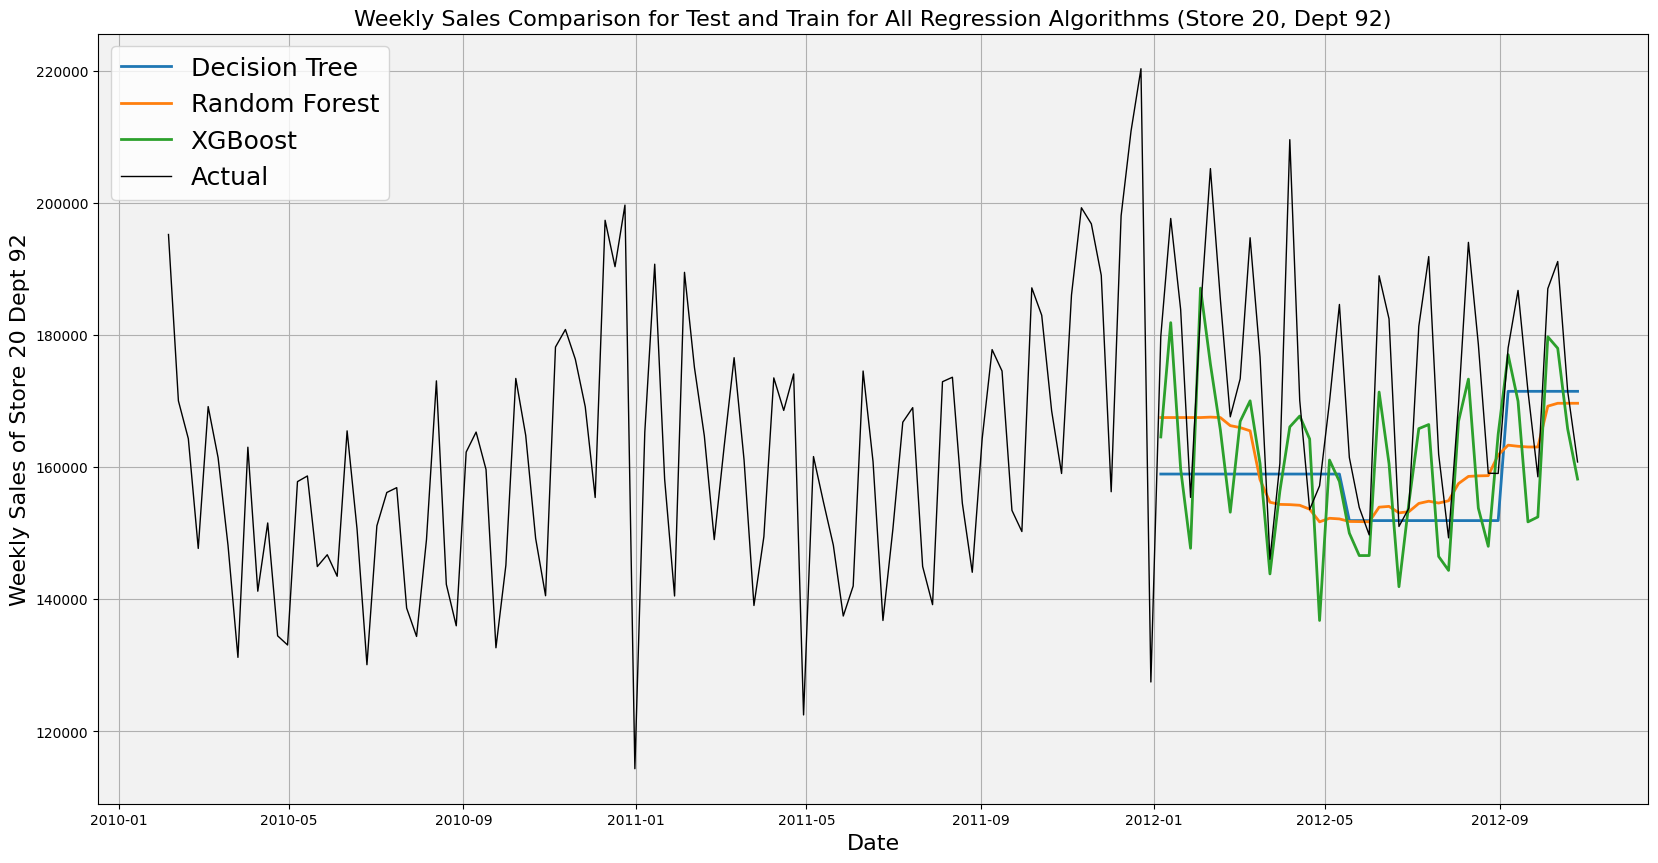

In [50]:
#Comparison of train and test set with Regression Models
fig,ax=plt.subplots(figsize=(20,10))

plt.plot(S20D92_regression.WS_dt,linewidth=2)
plt.plot(S20D92_regression.WS_rfr,linewidth=2)
plt.plot(S20D92_regression.WS_xgb,linewidth=2)
plt.plot(S20D92.Weekly_Sales,color='k',linewidth=1)

plt.legend(['Decision Tree','Random Forest','XGBoost','Actual'],loc=2,fontsize=18)
plt.grid(True)
plt.title('Weekly Sales Comparison for Test and Train for All Regression Algorithms (Store 20, Dept 92)',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Weekly Sales of Store 20 Dept 92',fontsize=16)
ax = plt.gca()
ax.set_facecolor('#f2f2f2')
plt.show()

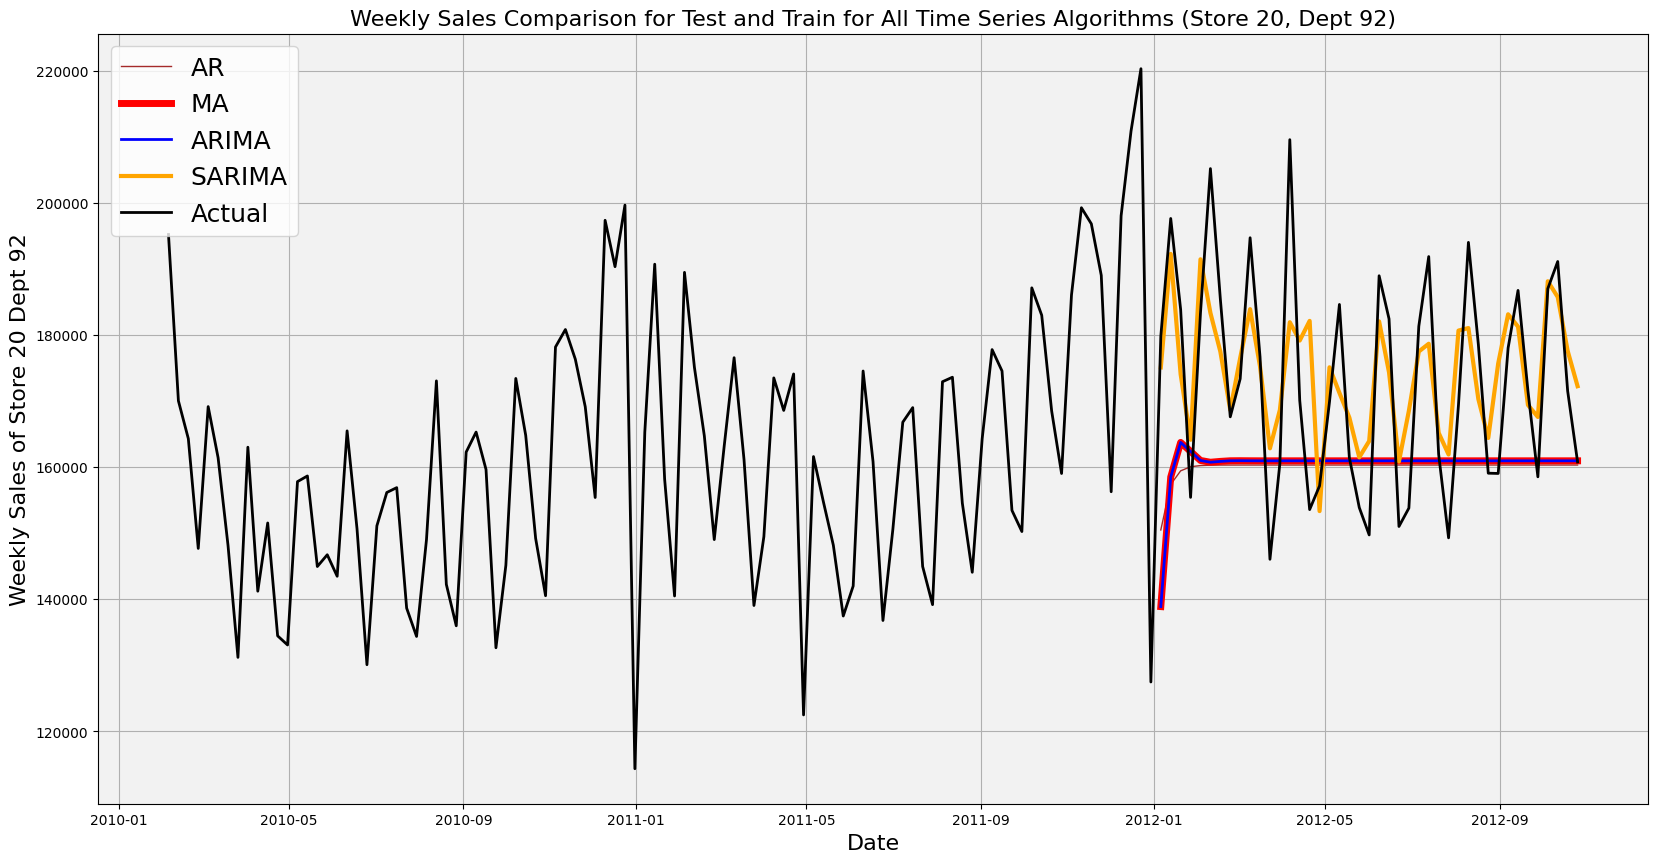

In [52]:
#Plotting the ARIMA model and compare against the actual value
fig,ax=plt.subplots(figsize=(20,10))

plt.plot(predictions_AR_one,linewidth=1,color='brown')
plt.plot(predictions_MA_one,linewidth=5,color='red')
plt.plot(predictions_ARIMA_one,linewidth=2,color='b')
plt.plot(predictions_SARIMA_one,linewidth=3,color='orange')


plt.plot(S20D92.Weekly_Sales,color='k',linewidth=2)

plt.legend(['AR','MA','ARIMA','SARIMA','Actual'],loc=2,fontsize=18)
plt.grid(True)
plt.title('Weekly Sales Comparison for Test and Train for All Time Series Algorithms (Store 20, Dept 92)',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Weekly Sales of Store 20 Dept 92',fontsize=16)

ax = plt.gca()
ax.set_facecolor('#f2f2f2')
plt.show()

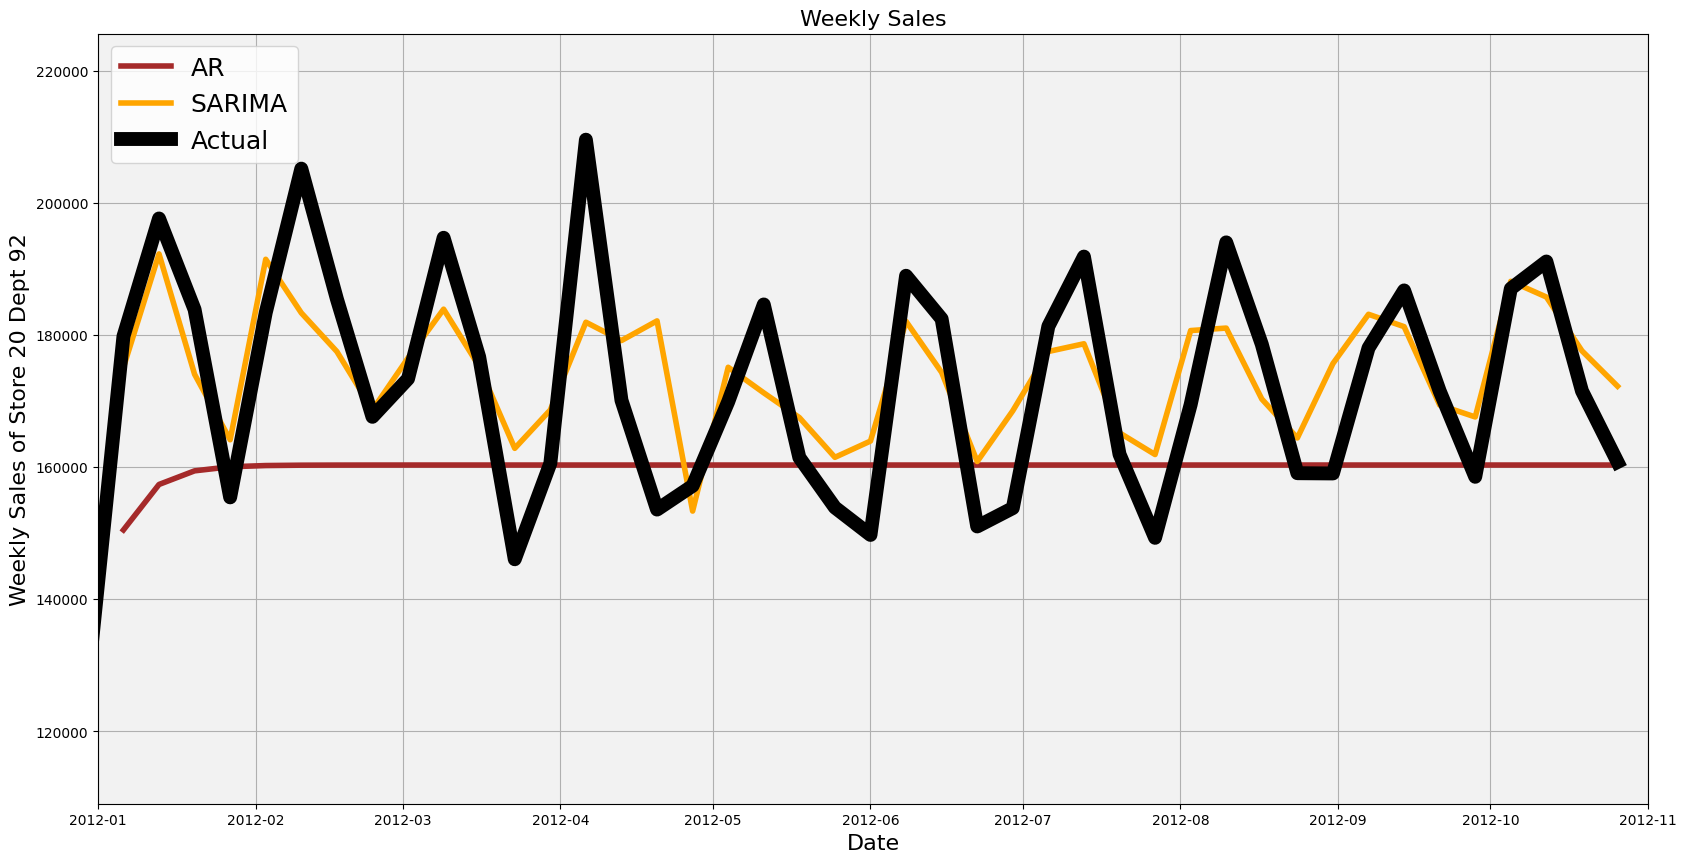

In [53]:
#Zoomed in view of the AR, SARIMA, Holt Winters, and Actual for better visualizaion
fig,ax=plt.subplots(figsize=(20,10))

plt.plot(predictions_AR_one,linewidth=4,color='brown')
plt.plot(predictions_SARIMA_one,linewidth=4,color='orange')
plt.plot(S20D92.Weekly_Sales,color='k',linewidth=10)

plt.legend(['AR','SARIMA','Actual'],loc=2,fontsize=18)
plt.title('Weekly Sales',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Weekly Sales of Store 20 Dept 92',fontsize=16)
ax.set_xlim([datetime.date(2012, 1, 1), datetime.date(2012,11, 1)])
plt.grid(True)
ax = plt.gca()
ax.set_facecolor('#f2f2f2')
plt.show()

# Predicting Value for Store 20 Dept 92 in Test.csv

In [54]:
#Load Prediction set
test_kaggle = pd.read_csv (r'Datasets\test.csv')

In [55]:
#Select only the values of Store 20 and Dept 92
S20D92_test=test_kaggle[test_kaggle['Store']==20]
S20D92_test=S20D92_test[test_kaggle['Dept']==92]
S20D92_test.head()

,Store,Dept,Date,IsHoliday
53596,20,92,2012-11-02,False
53597,20,92,2012-11-09,False
53598,20,92,2012-11-16,False
53599,20,92,2012-11-23,True
53600,20,92,2012-11-30,False


In [56]:
#S20D92_test.Date = pd.to_datetime(S20D92_test.Date,format='%Y-%m-%d')

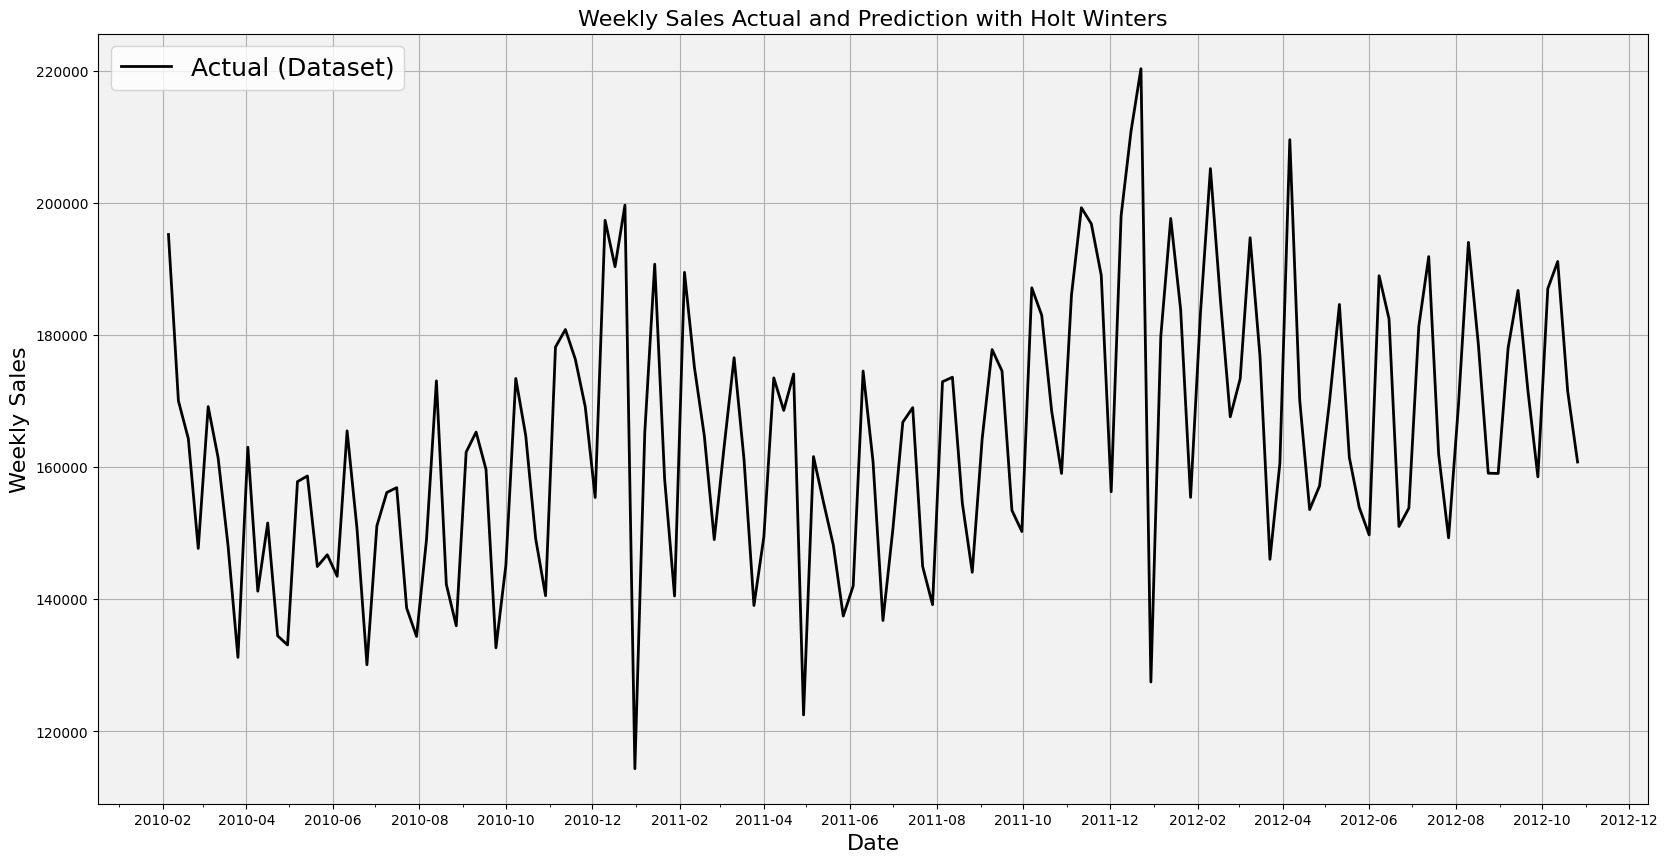

In [59]:
#Visualization of the Holt Winters predictions compared against actual
fig,ax=plt.subplots(figsize=(20,10))
plt.plot(S20D92.Weekly_Sales,color='k',linewidth=2)
plt.legend(['Actual (Dataset)','Holt Winters(Actual)','Holt Winters(Prediction)'],loc=2,fontsize=18)
plt.title('Weekly Sales Actual and Prediction with Holt Winters',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Weekly Sales',fontsize=16)

ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid(True)
ax = plt.gca()
ax.set_facecolor('#f2f2f2')
plt.show()

In [63]:
# Providing the Holt Winters predictions with Dates
S20D92_test1 = S20D92_test.drop(['Store', 'Dept', 'IsHoliday'], axis=1)

# Adding Year and Week for the Holt Winters Predictions
S20D92_test1['Date'] = pd.to_datetime(S20D92_test1['Date'], format='%Y-%m-%d')
S20D92_test1['Year'] = S20D92_test1['Date'].dt.year
S20D92_test1['Week'] = S20D92_test1['Date'].dt.isocalendar().week

# Separating the Holt Winters predictions in 2012 and 2013
prediction_Holt_2012 = S20D92_test1[S20D92_test1['Year'] == 2012]
prediction_Holt_2013 = S20D92_test1[S20D92_test1['Year'] == 2013]


In [64]:
#Load actual data of Store 20 Department 92 
Sales2010=S20D92[S20D92['Year']==2010] 
Sales2011=S20D92[S20D92['Year']==2011] 
Sales2012=S20D92[S20D92['Year']==2012]

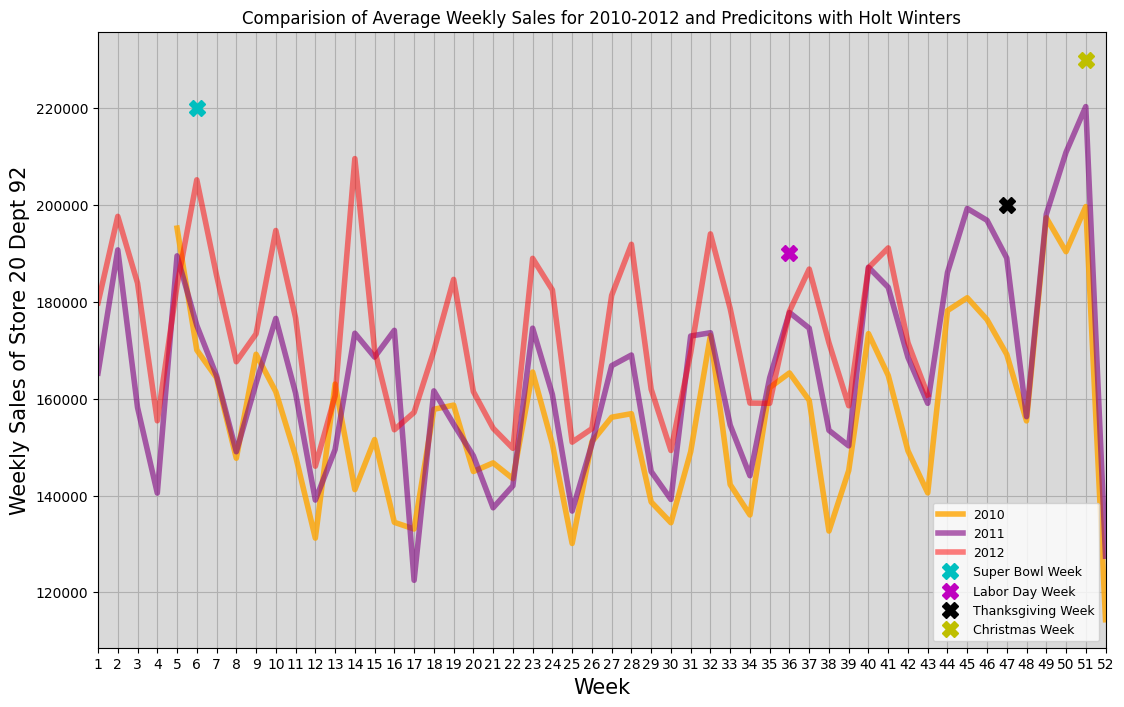

In [66]:
#visualize the weekly sales of Store 20 Department 92 for the year of 2010, 2011, 2012, and predictions with Holt Winters
plt.subplots(figsize=(13,8))
plt.plot(Sales2010.Week,Sales2010.Weekly_Sales,color='orange',alpha=0.8,linewidth=4)
plt.plot(Sales2011.Week,Sales2011.Weekly_Sales,color='purple',alpha=0.6,linewidth=4)
plt.plot(Sales2012.Week,Sales2012.Weekly_Sales,color='red',alpha=0.5,linewidth=4)


plt.plot(6,220000,'Xc',markersize=12)  #Holiday mark for Super Bowl Week
plt.plot(36,190000,'Xm',markersize=12) #Holiday mark for Labor Day Week
plt.plot(47,200000,'Xk',markersize=12) #Holiday mark for Thanksgiving Wek
plt.plot(51,230000,'Xy',markersize=12) #Holiday for Christmas

plt.xticks(np.arange(1,53,step=1))
plt.legend(['2010','2011','2012','Super Bowl Week','Labor Day Week','Thanksgiving Week','Christmas Week'],\
           loc=4,fontsize=9)
plt.xlabel('Week',fontsize=15)
plt.ylabel('Weekly Sales of Store 20 Dept 92', fontsize=15)
plt.title('Comparision of Average Weekly Sales for 2010-2012 and Predicitons with Holt Winters')
plt.grid(True)
plt.xlim(1,52)
ax = plt.gca()
ax.set_facecolor('#d9d9d9')
plt.show()